In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x = df.iloc[:, 0:11].values
y = df.iloc[:, 11:12].values

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.9, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 21).fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(len(y_pred), len(y_test))

160 160


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [7]:
from sklearn.metrics import confusion_matrix
y_pred_train = classifier.predict(x_train)
# cm = confusion_matrix(y_train, y_pred_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  0  1  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0 45 18  1  0]
 [ 0  0 20 46  7  0]
 [ 0  0  0 10  4  0]
 [ 0  0  0  1  1  0]]


In [129]:
classes = []
for i in y_test:
    is_exist = False
    for j in classes:
        if j == i[0]:
            is_exist = True
            break
    if not is_exist:
        classes.append(i[0])
            
classes.sort()
print('classes', classes)


for i in classes:
    count = 0
    for j in y_test:
        if i == j[0]:
            count +=1
    print('class name: ', i, ' count: ', count)        

classes [3, 4, 5, 6, 7, 8]
class name:  3  count:  1
class name:  4  count:  6
class name:  5  count:  64
class name:  6  count:  73
class name:  7  count:  14
class name:  8  count:  2


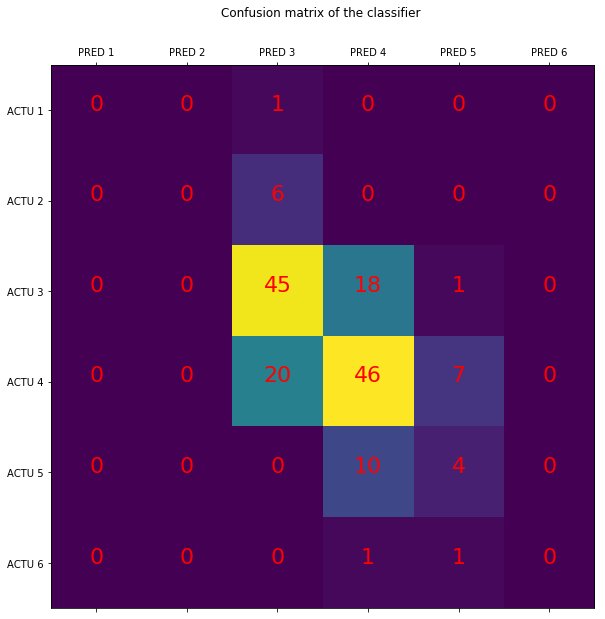

In [109]:
import itertools

labels = ['PRED 1', 'PRED 2','PRED 3','PRED 4','PRED 5','PRED 6',    'ACTU 1', 'ACTU 2','ACTU 3','ACTU 4','ACTU 5','ACTU 6']
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier \n')

ax.set_xticklabels([''] + labels[0:6])
ax.set_yticklabels([''] + labels[6:12])

fmt = '.0f'

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="red", fontsize = 22)

plt.show()